In [56]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting

# Hydrogen

Actual Rydberg Constant: 10967800.0. 
 Theoretical Rydberg Constant 10997810.303324675. 
 Difference: 30010.303324675187


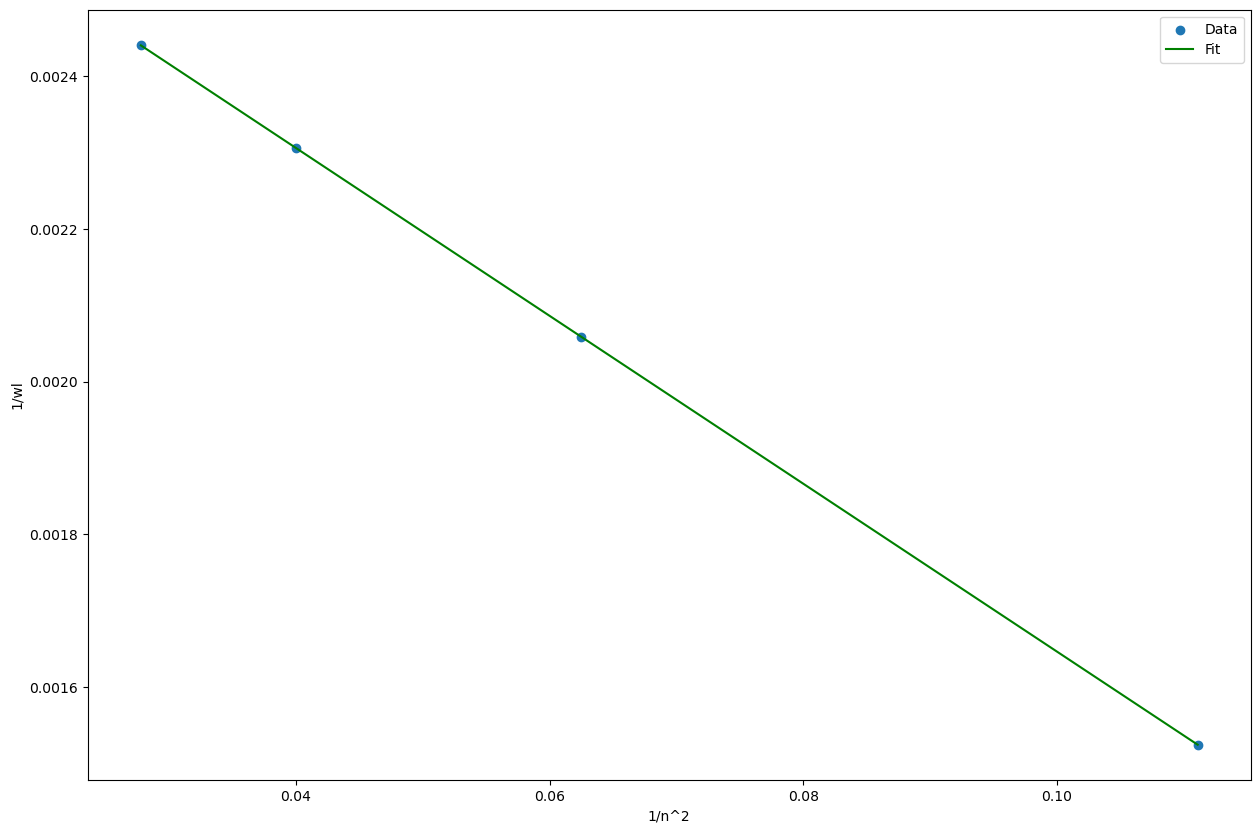

In [57]:
# General Constants

R_H = 1.09678E7 # Rydberg Constant (for Hydrogen)
n = np.arange(3, 7)
wl = np.array([655.9217890603793, 485.78885458930495, 433.7142810287651, 409.5642773103868])

# Data fit
a, b = np.polyfit(1/n**2, 1/wl, 1)
fit = a*(1/n**2) + b  # Use the same x-values as in the scatter plot

# Quick Check for accuracy:
ryd_exp = -1 * a * 1E9
print(f"Actual Rydberg Constant: {R_H}. \n Theoretical Rydberg Constant {ryd_exp}. \n Difference: {abs(R_H-ryd_exp)}")

# Plot
plt.figure(figsize=(15,10))
plt.scatter(1/n**2, 1/wl, label='Data')  # raw data scatter plot
plt.plot(1/n**2, fit, c='g', label='Fit')  # Plot using the same x-values
plt.xlabel('1/n^2')
plt.ylabel('1/wl')
plt.legend()
plt.show()

# Deuterium

In [59]:
wl = np.array([656.0934381861541, 485.9167418903065, 433.8307473764934, 409.7371194739568])

# Data fit
a, b = np.polyfit(1/n**2, 1/wl, 1)
fit = a*(1/n**2) + b  # Use the same x-values as in the scatter plot

# Quick Check for accuracy:
ryd_exp = -1 * a * 1E9
print(f"Actual Rydberg Constant: {R_D} \n Theoretical Rydberg Constant {ryd_exp}. \n Difference: {abs(R_D-ryd_exp)}")

# Plot
plt.figure(figsize=(15,10))
plt.scatter(1/n**2, 1/wl, label='Data')  # raw data scatter plot
plt.plot(1/n**2, fit, c='g', label='Fit')  # Plot using the same x-values
plt.xlabel('1/n^2')
plt.ylabel('1/wl')
plt.legend()
plt.show()

SyntaxError: f-string expression part cannot include a backslash (2872782405.py, line 9)